## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Dataset

In [2]:
df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#dropping the prediction column  from X
X=df.drop('Outcome',axis=1)

In [5]:
y=df['Outcome'].values.reshape(X.shape[0], 1)

splitting to training and test data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Standardising the dataset

In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

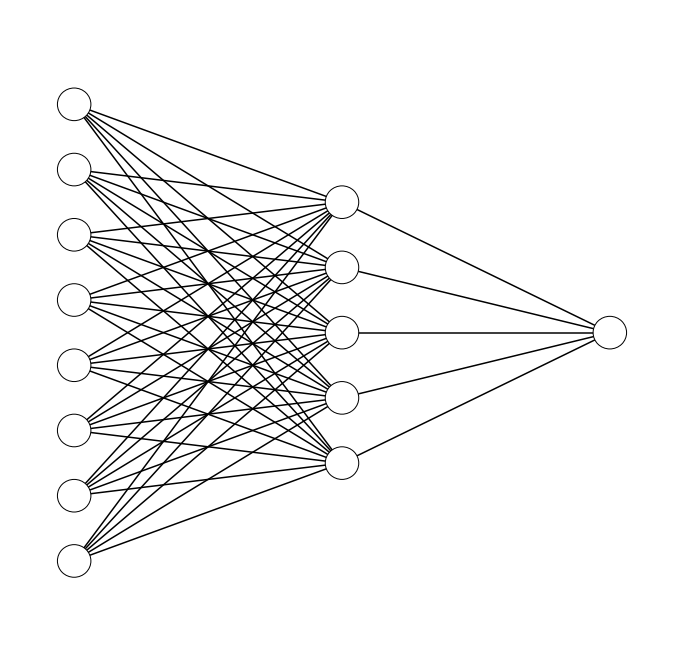

Function to initialise the weights and biases for the hidden layer(5 nodes) and output layer (1 node)

#### ReLU (Rectified Linear Unit)
It will return the value passed to it if it is greater than zero; otherwise, it returns zero.\
The weighter sum and bias term from the input layer is passed to this activation function

#### Sigmoid function
Take a real number and squashes it to value between 0 and 1.


#### Loss Function
Loss function helps us measure how good our model's prediction is so as to adjust weights and biases

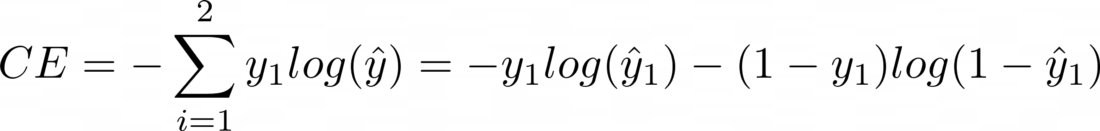

Binary Cross Entropy function called logloss, used for binary classification problems

C- number of classes\
y- true value\
yhat- preicted value

When our neural network gives 0 value to log, this results in infinity which affects the training and loss becomes inf. \
To avoid this, if our value is 0, then it is replaced with an extremely small value

#### Forward Propagation
- compute the weighted sum and adding the bias term for the first layer
- pass the sum through ReLU activation function
- use the output of previous layer and compute weighted sum and add bias
- pass the second sum to the sigmoid activation function
- compute loss between true value and predicted value

#### BackPropagation
- calculate the derivatives backward, from the loss all the way up to the first weight and bias.

In [8]:
class NeuralNetwork():
    '''
    A two layer neural network having 
    - input layer ( 8 nodes)
    - hidden layer (5 nodes)
    - output layer (1 node) (binary classification)
    '''
        
    def __init__(self, layers=[8,4,1], lr=0.005, epochs=110):
        #parameters having weights, biases, summed weights , activation function output of layers
        self.parameters = {}
        #learning rate
        self.lr = lr
        #epochs- number of iterations to train over
        self.epochs = epochs
        self.losses = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def parameter_init(self):
        '''
        Initialize the weights randomly using numpy
        W1- weights of the nodes in input layer (8,5)
        b1- biases of nodes in hidden layer
        W2- weights of the nodes in hidden layer (5,1)
        b2- biases of nodes in output layer
        '''
        np.random.seed(42) # Seed the random number generator
        self.parameters["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.parameters['b1']  =np.random.randn(self.layers[1],)
        self.parameters['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.parameters['b2'] = np.random.randn(self.layers[2],)
    
    def relu(self,Z):
        '''
        ReLU (Rectified Linear Unit)
        It will return the value passed to it if it is greater than zero; 
        otherwise, it returns zero.
        The weighter sum and bias term from the input layer is passed to this activation function
        '''
        return np.maximum(0,Z)

    def relu_der(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
        """
        When our neural network gives 0 value to log, this results in infinity which affects the training and loss becomes inf.
        To avoid this, if our value is 0, then it is replaced with an extremely small value"""
        ETA = 0.00000001
        return np.maximum(x, ETA)


    def sigmoid(self,Z):
        '''
        Sigmoid function
        Take a real number and squashes it to value between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def entropy_loss(self,y, yhat):
        
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.parameters['W1']) + self.parameters['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.parameters['W2']) + self.parameters['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.parameters['Z1'] = Z1
        self.parameters['Z2'] = Z2
        self.parameters['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.parameters['W2'].T)
        dl_wrt_w2 = self.parameters['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.relu_der(self.parameters['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.parameters['W1'] = self.parameters['W1'] - self.lr * dl_wrt_w1
        self.parameters['W2'] = self.parameters['W2'] - self.lr * dl_wrt_w2
        self.parameters['b1'] = self.parameters['b1'] - self.lr * dl_wrt_b1
        self.parameters['b2'] = self.parameters['b2'] - self.lr * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.parameter_init() #initialize weights and bias


        for i in range(self.epochs):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.losses.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.parameters['W1']) + self.parameters['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.parameters['W2']) + self.parameters['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.losses)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show() 

In [9]:
nn=NeuralNetwork() 
nn.fit(X_train, y_train)

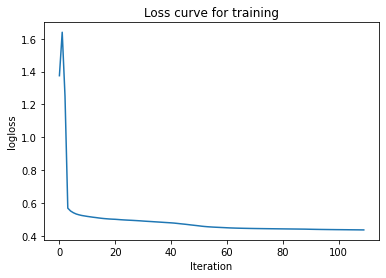

In [10]:
nn.plot_loss()

Train accuracy is 78
Test accuracy is 75
[[90 19]
 [18 27]]


Text(69.0, 0.5, 'Predicted Values')

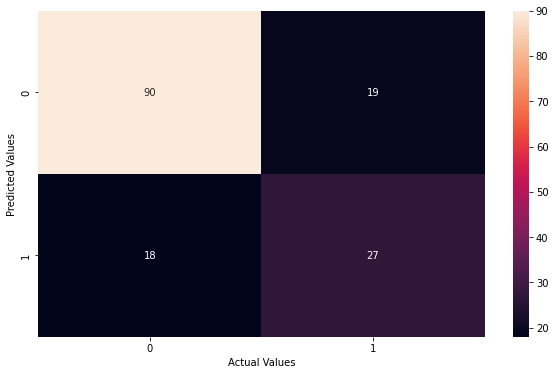

In [11]:
train_pred = nn.predict(X_train)
test_pred = nn.predict(X_test)

print("Train accuracy is {}".format(nn.acc(y_train, train_pred)))
print("Test accuracy is {}".format(nn.acc(y_test, test_pred)))

conf_matrix = confusion_matrix(y_test ,test_pred)
print(conf_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

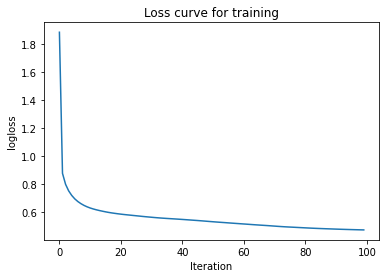

Train accuracy is 75
Test accuracy is 72
[[91 18]
 [24 21]]


Text(69.0, 0.5, 'Predicted Values')

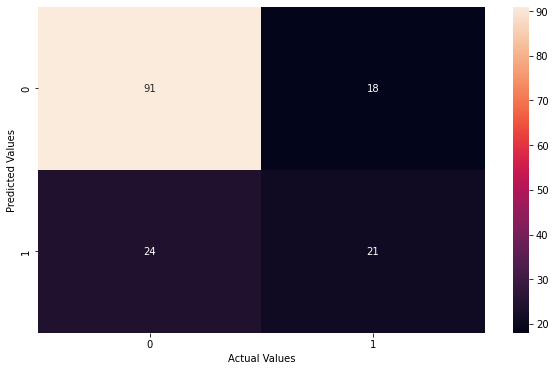

In [12]:
nn2= NeuralNetwork(layers=[8,7,1], lr=0.001, epochs=100) 
nn2.fit(X_train, y_train) #train the model
nn2.plot_loss()

train_pred = nn2.predict(X_train)
test_pred = nn2.predict(X_test)

print("Train accuracy is {}".format(nn2.acc(y_train, train_pred)))
print("Test accuracy is {}".format(nn2.acc(y_test, test_pred)))

conf_matrix = confusion_matrix(y_test ,test_pred)
print(conf_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')